# Keras- Convolutional Neural Network

##  Digit Recognization: NMIST

### 1. Baseline MLP for MNIST dataset

In [1]:
# Baseline MLP for MNIST dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


##### Prepare Data Set

In [24]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

* How many data files are there?

In [27]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [29]:
y_train.shape,y_test.shape

((60000,), (10000,))

#### Visualize the data

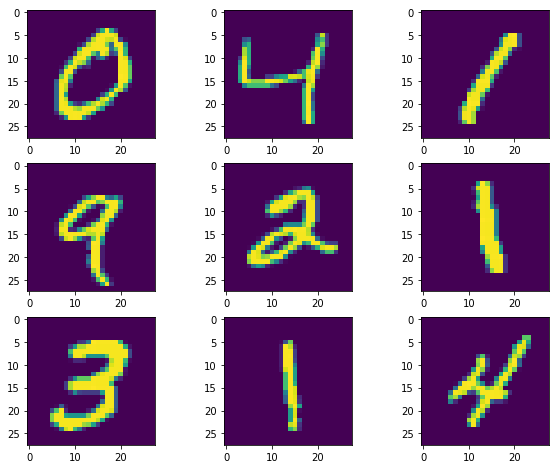

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = [10,8])
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X_train[i])
plt.show()

#### Convert Image matrix to Vector

In [30]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#### Normalization

In [31]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

#### Prepare Labels

In [32]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

##### Model

In [33]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
    
	model.add(Dense(num_pixels,
                    input_dim=num_pixels,
                    kernel_initializer='normal',
                    activation='relu'))
    
	model.add(Dense(num_classes,
                    kernel_initializer='normal',
                    activation='softmax'))
    
	# Compile model
	model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
	return model

##### Build Model

In [34]:
model = baseline_model()
model.summary()

# Fit the model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=200,
          verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2801 - acc: 0.9209 - val_loss: 0.1417 - val_acc: 0.9572
Epoch 2/10
 - 3s - loss: 0.1118 - acc: 0.9676 - val_loss: 0.0921 - val_acc: 0.9705
Epoch 3/10
 - 3s - loss: 0.0720 - acc: 0.9794 - val_loss: 0.0785 - val_acc: 0.9773
Epoch 4/10
 - 3s - loss: 0.0505 - acc: 0.9857 - val_loss: 0.0739 - val_acc: 0.9772
Epoch 5/10
 - 3s - loss: 0.037

##### Evaluation

In [35]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.82%


---------

### 2.  Simple CNN for the MNIST Dataset

In [36]:
# Simple CNN for the MNIST Dataset
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [37]:
# fix dimension ordering issue
from keras import backend as K
K.set_image_dim_ordering('th')

##### Get Data

In [38]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


##### Model

In [39]:
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
    
	model.add(Conv2D(32,
                     (5, 5),
                     input_shape=(1, 28, 28),
                     activation='relu'))
    
    
	model.add(MaxPooling2D(pool_size=(2, 2)))
    
	model.add(Dropout(0.2))
    
	model.add(Flatten())
    
	model.add(Dense(128, activation='relu'))
    
	model.add(Dense(num_classes, activation='softmax'))
    
    
    
	# Compile model
	model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])
    
    
	return model


##### Build

In [40]:
# build the model
model = baseline_model()
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 592,074
Train

##### Fit Model

In [41]:
# Fit the model
model.fit(X_train,
          y_train,
          validation_data=(X_test, y_test),
          epochs=4,
          batch_size=200)


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 26s 436us/step - loss: 0.2234 - acc: 0.9364 - val_loss: 0.0783 - val_acc: 0.9751
Epoch 2/4
60000/60000 [==============================] - 26s 428us/step - loss: 0.0712 - acc: 0.9787 - val_loss: 0.0456 - val_acc: 0.9851
Epoch 3/4
60000/60000 [==============================] - 25s 419us/step - loss: 0.0510 - acc: 0.9844 - val_loss: 0.0439 - val_acc: 0.9860
Epoch 4/4
60000/60000 [==============================] - 25s 416us/step - loss: 0.0393 - acc: 0.9880 - val_loss: 0.0402 - val_acc: 0.9878


##### Evaluate Model

In [42]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


CNN Error: 1.22%


-------

### 3. Larger CNN for the MNIST Dataset

#### Prepare Data

In [43]:
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

##### Model

In [44]:
# define the larger model
def larger_model():
	# create model
	model = Sequential()
    
	model.add(Conv2D(30, 
                     (5, 5),
                     input_shape=(1, 28, 28),
                     activation='relu'))
    
	model.add(MaxPooling2D(pool_size=(2, 2)))
    
	model.add(Conv2D(15, (3, 3), activation='relu'))
    
	model.add(MaxPooling2D(pool_size=(2, 2)))
    
	model.add(Dropout(0.2))
    
	model.add(Flatten())
    
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
    
	model.add(Dense(num_classes, activation='softmax'))
    
    
	# Compile model    
	model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    
	return model

##### Build Model

In [45]:
# build the model
model = larger_model()

##### Fit Model

In [46]:
# Fit the model
model.fit(X_train,
          y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=200)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 510us/step - loss: 0.3871 - acc: 0.8817 - val_loss: 0.0904 - val_acc: 0.9714
Epoch 2/10
60000/60000 [==============================] - 30s 494us/step - loss: 0.0998 - acc: 0.9699 - val_loss: 0.0540 - val_acc: 0.9829
Epoch 3/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.0738 - acc: 0.9772 - val_loss: 0.0417 - val_acc: 0.9864
Epoch 4/10
60000/60000 [==============================] - 29s 492us/step - loss: 0.0602 - acc: 0.9816 - val_loss: 0.0375 - val_acc: 0.9870
Epoch 5/10
60000/60000 [==============================] - 29s 487us/step - loss: 0.0517 - acc: 0.9835 - val_loss: 0.0359 - val_acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0446 - acc: 0.9855 - val_loss: 0.0307 - val_acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 40s 665us/step - loss: 0.0393 - acc: 0.9880 - val_loss: 0.

##### Evalauation

In [47]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 0.94%


##### Plot

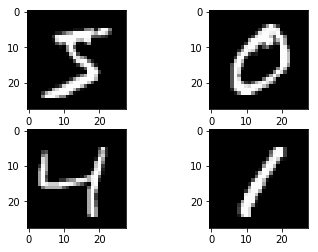

In [48]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

--------